IMPORTATION DES MODULE

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from pathlib import Path
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split;
import PIL
import cv2
import os 
from sklearn.linear_model import LinearRegression
from keras.callbacks import EarlyStopping

IMPORTATION DU DATA SET

In [2]:
#train image
image_dir = Path('Braille_Dataset')
dir_list = list(image_dir.glob('*.jpg'))

In [3]:
#test image
image_dir_test = Path('Test_Dataset')
dir_list_test = list(image_dir_test.glob('*.jpg'))

RECUPARATION DES NOM POUR CHAQUE IMAGE

In [4]:
#target train
name_list = []
for i in dir_list:
    name_list.append(os.path.basename(i)[0])

In [5]:
#target test
name_list_test = []
for i in dir_list_test:
    name_list_test.append(os.path.basename(i)[0])

In [6]:
print(name_list)

['a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd',

In [7]:
#open image and puts into a list
images = []
for dir in dir_list:
    I = cv2.imread(str(dir))
    img1 = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
    images.append(img1)

In [8]:
#for the test
images_test = []
for dir in dir_list_test:
    T = cv2.imread(str(dir))
    img2 = cv2.cvtColor(T, cv2.COLOR_BGR2GRAY)
    images_test.append(img2)

In [9]:
#train image and target train image
images_list = np.array(images)
name_list = np.array(name_list).T

In [10]:
print(name_list)

['a' 'a' 'a' ... 'z' 'z' 'z']


In [11]:
#test image and target test image
images_list_test = np.array(images_test)
name_list_test = np.array(name_list_test).T

In [12]:
print(name_list_test)

['a' 'a' 'a' 'a' 'a' 'b' 'b' 'b' 'b' 'b' 'c' 'c' 'c' 'c' 'c' 'd' 'd' 'd'
 'd' 'd' 'e' 'e' 'e' 'e' 'e' 'f' 'f' 'f' 'f' 'f' 'g' 'g' 'g' 'g' 'g' 'h'
 'h' 'h' 'h' 'h' 'i' 'i' 'i' 'i' 'i' 'j' 'j' 'j' 'j' 'j' 'k' 'k' 'k' 'k'
 'k' 'l' 'l' 'l' 'l' 'l' 'm' 'm' 'm' 'm' 'm' 'n' 'n' 'n' 'n' 'n' 'o' 'o'
 'o' 'o' 'o' 'p' 'p' 'p' 'p' 'p' 'q' 'q' 'q' 'q' 'q' 'r' 'r' 'r' 'r' 'r'
 's' 's' 's' 's' 's' 't' 't' 't' 't' 't' 'u' 'u' 'u' 'u' 'u' 'v' 'v' 'v'
 'v' 'v' 'w' 'w' 'w' 'w' 'w' 'x' 'x' 'x' 'x' 'x' 'y' 'y' 'y' 'y' 'y' 'z'
 'z' 'z' 'z' 'z']


#

In [13]:
print(images_list.shape)
print(name_list.shape)

(1560, 28, 28)
(1560,)


In [14]:
print(images_list_test.shape)
print(name_list_test.shape)

(130, 28, 28)
(130,)


In [15]:
le = LabelEncoder()
name_list = le.fit_transform(name_list)
name_list_test = le.fit_transform(name_list)

In [16]:
print(name_list)
print(name_list_test)

[ 0  0  0 ... 25 25 25]
[ 0  0  0 ... 25 25 25]


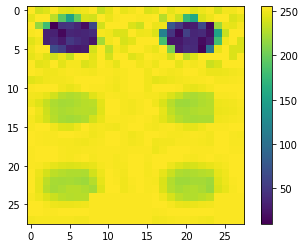

In [17]:
plt.figure()
plt.imshow(images_list[129])
plt.colorbar()
plt.grid(False)

In [18]:
classe_nomLettre = ['A','B','C','D','E','F','G',
                    'H','I','J','K','L','M','N',
                    'O','P','Q','R','S','T','U',
                    'V','W','X','Y','Z']

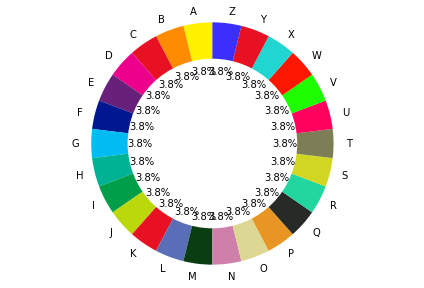

In [19]:
labels = classe_nomLettre
sizes = np.unique(name_list,return_counts=True)[1]
#
colors =['#fff100','#ff8c00','#e81123','#ec008c','#68217a','#00188f',
         '#00bcf2','#00b294','#009e49','#bad80a','#e81123','#5A6EB7',
         '#0B3D12','#CE80AB','#DCD893','#e89523','#282A28','#21D69F',
         '#D0D621','#7D7E56','#FF025E','#1FFE00','#FE1700','#21D6D0',
         '#e81123','#3B2FFB']
#
#
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
#
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
#
ax1.axis('equal')  
plt.tight_layout()
plt.show()

## CREATION DU  MODEL

In [20]:
#convert to float
images_list = images_list.astype(float)
images_list_test = images_list_test.astype(float)

In [21]:
#on normalise les pixels pour avoir des valeur entre 0 et 1
images_list = images_list/255
images_list_test = images_list_test/255

###

In [22]:
#creation du model sequentiel

model = tf.keras.models.Sequential()

In [23]:
#une premier couche qui va convertir la matrice en vecteur

model.add(tf.keras.layers.Flatten(input_shape=[28,28]))

In [24]:
#les couches cache
model.add(tf.keras.layers.Dense(254, activation="relu"))
model.add(tf.keras.layers.Dense(128, activation="relu"))
#couche de sortie
model.add(tf.keras.layers.Dense(26, activation="softmax"))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 254)               199390    
                                                                 
 dense_1 (Dense)             (None, 128)               32640     
                                                                 
 dense_2 (Dense)             (None, 26)                3354      
                                                                 
Total params: 235,384
Trainable params: 235,384
Non-trainable params: 0
_________________________________________________________________


In [26]:
#compiler le model
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer="adam",
    metrics=["accuracy"]
)

In [27]:
#entrainement du reseaux avec le model
history = model.fit(
    images_list, name_list,
    epochs=20,
    validation_split=0.2
)

Epoch 1/20


C:\Users\Ntumbabu\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


39/39 [==============================] - 2s 12ms/step - loss: 3.1726 - accuracy: 0.0665 - val_loss: 6.2924 - val_accuracy: 0.0000e+00
Epoch 2/20
39/39 [==============================] - 0s 5ms/step - loss: 3.0254 - accuracy: 0.0889 - val_loss: 6.3290 - val_accuracy: 0.0000e+00
Epoch 3/20
39/39 [==============================] - 0s 6ms/step - loss: 2.9354 - accuracy: 0.1546 - val_loss: 7.5200 - val_accuracy: 0.0000e+00
Epoch 4/20
39/39 [==============================] - 0s 5ms/step - loss: 2.8057 - accuracy: 0.1867 - val_loss: 7.6375 - val_accuracy: 0.0000e+00
Epoch 5/20
39/39 [==============================] - 0s 5ms/step - loss: 2.6360 - accuracy: 0.2596 - val_loss: 8.8810 - val_accuracy: 0.0000e+00
Epoch 6/20
39/39 [==============================] - 0s 6ms/step - loss: 2.4708 - accuracy: 0.2845 - val_loss: 9.1377 - val_accuracy: 0.0000e+00
Epoch 7/20
39/39 [==============================] - 0s 5ms/step - loss: 2.3270 - accuracy: 0.3518 - val_loss: 9.8224 - val_accuracy: 0.0000e+00
Ep

# TESTER LES RESULTATS

In [28]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [29]:
loss_curve = history.history['loss']
acc_curve = history.history['accuracy']


In [30]:
loss_val_curve = history.history['val_loss']
acc_val_curve = history.history['val_accuracy']



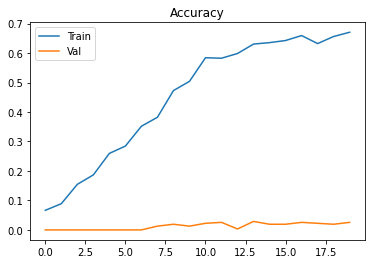

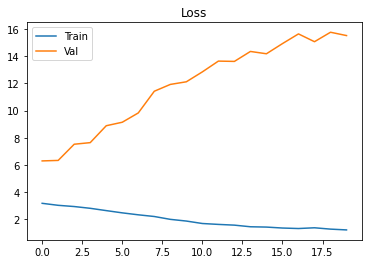

In [31]:
plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

## APERCU

In [32]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [33]:
predictions = probability_model.predict(images_list_test)
predictions[0]

5/5 [==============================] - 0s 3ms/step


array([0.05920317, 0.03812085, 0.04442893, 0.03708051, 0.03753348,
       0.03692084, 0.03700544, 0.03684895, 0.03685011, 0.03681578,
       0.0410156 , 0.03684083, 0.03715151, 0.03942916, 0.03785427,
       0.0369005 , 0.03699797, 0.03688823, 0.03684148, 0.03681706,
       0.03837803, 0.03681546, 0.03681546, 0.03681549, 0.0368155 ,
       0.03681547], dtype=float32)

In [34]:
np.argmax(predictions[0])

0

In [35]:
def plot_image(i, predictions_array, true_label, img):
    
  true_label = true_label[i]
  img = img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(name_list_test[predicted_label],
                                100*np.max(predictions_array),
                                classe_nomLettre[true_label]),
                                color=color)

In [36]:
def plot_value_array(i, predictions_array, true_label):
    
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(26))
  plt.yticks([])
  thisplot = plt.bar(range(26), predictions_array,color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

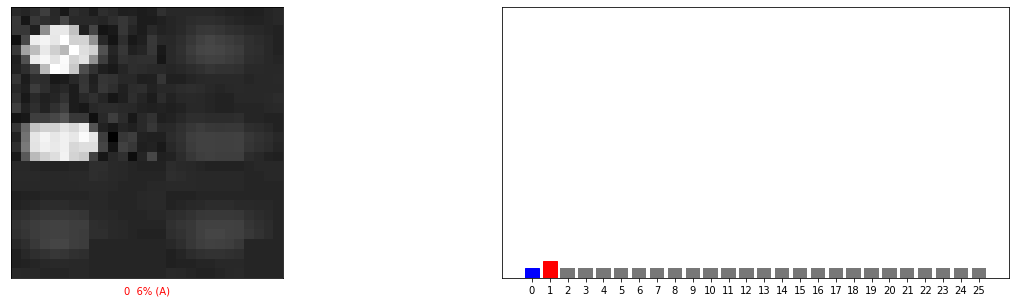

In [37]:
i = 5
plt.figure(figsize=(20,5))
##
plt.subplot(1,2,1)
plot_image(i, predictions[i], name_list_test, images_list_test)
##
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  name_list_test)
##
plt.show()